# Multiclass classification
---------------------------------

This example shows how to compare the performance of three models on a multiclass classification task.

Import the wine dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset). This is a small and easy to train dataset whose goal is to predict wines into three groups (which cultivator it's from) using features based on the results of chemical analysis.

## Load the data

In [8]:
# Import packages
from sklearn.datasets import load_wine
from atom import ATOMClassifier

In [9]:
# Load data
X, y = load_wine(return_X_y=True, as_frame=True)

# Let's have a look
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Run the pipeline

In [10]:
atom = ATOMClassifier(X, y, n_jobs=-1, warnings=False, verbose=2, random_state=1)

# Fit the pipeline with the selected models
atom.run(
    models=["LR","LDA", "RF"],
    metric="roc_auc_ovr",
    n_calls=4,
    n_initial_points=3,
    bo_params={"base_estimator": "rf", "max_time": 100},
    n_bootstrap=5,
)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.
Parallel processing with 16 cores.

Dataset stats ==================== >>
Shape: (178, 14)
Scaled: False
Outlier values: 10 (0.5%)
-------------------------------------
Train set size: 143
Test set size: 35
-------------------------------------
|    |    dataset |      train |       test |
| -- | ---------- | ---------- | ---------- |
| 0  |   59 (1.2) |   50 (1.4) |    9 (1.0) |
| 1  |   71 (1.5) |   58 (1.7) |   13 (1.4) |
| 2  |   48 (1.0) |   35 (1.0) |   13 (1.4) |


Training ========================= >>
Models: LR, LDA, RF
Metric: roc_auc_ovr


Running BO for Logistic Regression...
| call             | penalty |       C |  solver | max_iter | l1_ratio | roc_auc_ovr | best_roc_auc_ovr |    time | total_time |
| ---------------- | ------- | ------- | ------- | -------- | -------- | ----------- | ---------------- | ------- | ---------- |
| Initial point 1  |    none |     --- |   lbfgs |     

## Analyze the results

In [11]:
atom.results

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LR,1.000000,2.325s,1.0,0.996503,0.297s,0.996037,0.000932,1.531s,4.154s
LDA,1.000000,0.656s,1.0,1.000000,0.000s,0.996633,0.002441,0.031s,0.688s
RF,0.996612,2.235s,1.0,0.988345,0.319s,0.979953,0.009537,1.379s,3.933s


In [12]:
# Show the score for some different metrics
atom.evaluate(["precision_macro", "recall_macro", "jaccard_weighted"])

,precision_macro,recall_macro,jaccard_weighted
LR,0.976190,0.974359,0.944898
LDA,1.000000,1.000000,1.000000
RF,0.955556,0.948718,0.893333


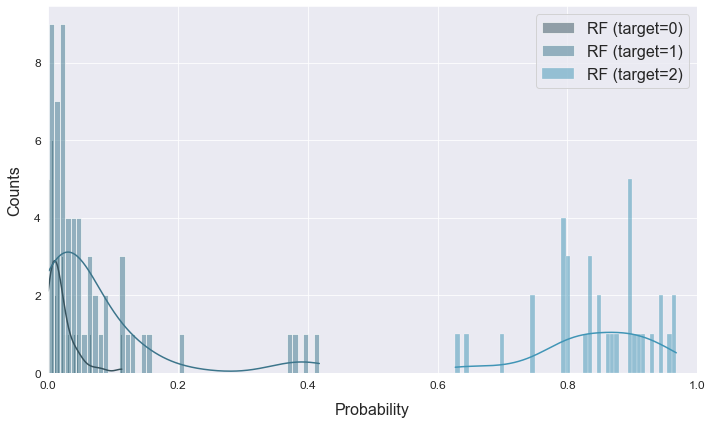

In [13]:
# Some plots allow you to choose the target class to look at
atom.rf.plot_probabilities(dataset="train", target=2)

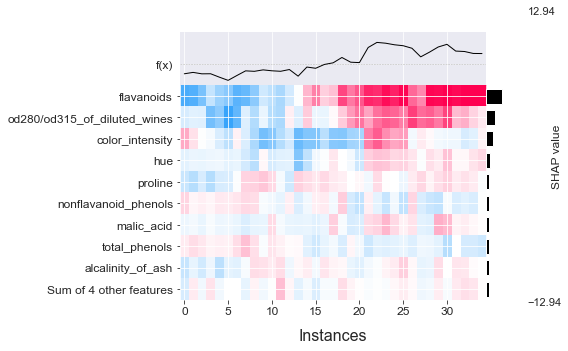

In [14]:
atom.lda.heatmap_plot(target=2, show=10, figsize=(8, 5))